# PyTorch

## Summary

- Introduction
- Tensor API
- Autograd engine
- Neural networks API

 ## Introduction

### PyTorch in a nutshell

- ML/DL platform supported by Facebook.
- Core components:
  - a tensor manipulation library similar to NumPy;
  - an autodifferentiation engine for computing gradients;
  - a neural network API.
- Based on previous work, notably [Torch](http://torch.ch/) and [Chainer](https://chainer.org/).
- Initial release in Oct. 2016, v1.0 in Dec. 2018.

[![PyTorch logo](images/pytorch-logo-dark.png)](https://pytorch.org)

### PyTorch's popularity among researchers

[![PyTorch State of AI 2020 stats](images/pytorch_stateofai2020.png)](https://www.stateof.ai/)

(source: [state of AI 2020 report](https://www.stateof.ai/))

## Tensor API

### PyTorch tensors

PyTorch provides a NumPy-like API for manipulating tensors.

Contrary to NumPy, PyTorch tensors can be located on GPU for faster computations.

Read the [official documentation](https://pytorch.org/docs/stable/torch.html) for more details.

### Environment setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Python version: 3.7.9


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()
%load_ext tensorboard

<font color="blue">

tensorboard
    
</font>

In [3]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

from sklearn.datasets import make_moons

import torch

print(f"PyTorch version: {torch.__version__}")

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

scikit-learn version: 0.23.2
PyTorch version: 1.4.0


In [4]:
def plot_planar_data(X, y):
    """Plot some 2D data"""

    plt.figure()
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'ob', alpha=0.5, label=1)
    plt.legend()

### Tensor creation

In [5]:
# Create 1D tensor with predefined values
t = torch.tensor([5.5, 3])

print(t)
print(t.shape)

tensor([5.5000, 3.0000])
torch.Size([2])


In [6]:
# Create 2D tensor filled with random numbers from a uniform distribution
x = torch.rand(5, 3)

print(x)
print(x.shape)

tensor([[7.1838e-01, 4.5364e-01, 1.3917e-01],
        [6.7209e-01, 8.1712e-01, 5.9571e-01],
        [6.7651e-04, 7.3230e-01, 6.4071e-01],
        [9.9636e-02, 5.6039e-01, 7.5884e-01],
        [2.0400e-01, 5.0134e-01, 4.5330e-01]])
torch.Size([5, 3])


### Operations

In [7]:
# Addition operator
y = x + 2

print(y)

tensor([[2.7184, 2.4536, 2.1392],
        [2.6721, 2.8171, 2.5957],
        [2.0007, 2.7323, 2.6407],
        [2.0996, 2.5604, 2.7588],
        [2.2040, 2.5013, 2.4533]])


In [8]:
# Addition method
y = torch.add(x, 2)

print(y)

tensor([[2.7184, 2.4536, 2.1392],
        [2.6721, 2.8171, 2.5957],
        [2.0007, 2.7323, 2.6407],
        [2.0996, 2.5604, 2.7588],
        [2.2040, 2.5013, 2.4533]])


In [9]:
y = torch.zeros(5, 3)

# In-place addition: tensor is mutated
y.add_(x)
y.add_(2)

print(y)

tensor([[2.7184, 2.4536, 2.1392],
        [2.6721, 2.8171, 2.5957],
        [2.0007, 2.7323, 2.6407],
        [2.0996, 2.5604, 2.7588],
        [2.2040, 2.5013, 2.4533]])


### Indexing

In [10]:
print(x)

# Print second column of tensor
print(x[:, 1])

tensor([[7.1838e-01, 4.5364e-01, 1.3917e-01],
        [6.7209e-01, 8.1712e-01, 5.9571e-01],
        [6.7651e-04, 7.3230e-01, 6.4071e-01],
        [9.9636e-02, 5.6039e-01, 7.5884e-01],
        [2.0400e-01, 5.0134e-01, 4.5330e-01]])
tensor([0.4536, 0.8171, 0.7323, 0.5604, 0.5013])


### Reshaping with *view()*

PyTorch allows a tensor to be a *view* of an existing tensor. For memory efficiency reasons, view tensorw share the same underlying data with their base tensor. 

In [11]:
# Reshape into a (15,) vector
x.view(15)

tensor([7.1838e-01, 4.5364e-01, 1.3917e-01, 6.7209e-01, 8.1712e-01, 5.9571e-01,
        6.7651e-04, 7.3230e-01, 6.4071e-01, 9.9636e-02, 5.6039e-01, 7.5884e-01,
        2.0400e-01, 5.0134e-01, 4.5330e-01])

In [12]:
# The dimension identified by -1 is inferred from other dimensions
print(x.view(-1, 5))  # Shape: (3,5)
print(x.view(5, -1))  # Shape: (5, 3)
print(x.view(-1,))  # Shape: (15,)

# Error: a tensor of size 15 can't be reshaped into a (?, 4) tensor
# print(x.view(-1, 4))

tensor([[7.1838e-01, 4.5364e-01, 1.3917e-01, 6.7209e-01, 8.1712e-01],
        [5.9571e-01, 6.7651e-04, 7.3230e-01, 6.4071e-01, 9.9636e-02],
        [5.6039e-01, 7.5884e-01, 2.0400e-01, 5.0134e-01, 4.5330e-01]])
tensor([[7.1838e-01, 4.5364e-01, 1.3917e-01],
        [6.7209e-01, 8.1712e-01, 5.9571e-01],
        [6.7651e-04, 7.3230e-01, 6.4071e-01],
        [9.9636e-02, 5.6039e-01, 7.5884e-01],
        [2.0400e-01, 5.0134e-01, 4.5330e-01]])
tensor([7.1838e-01, 4.5364e-01, 1.3917e-01, 6.7209e-01, 8.1712e-01, 5.9571e-01,
        6.7651e-04, 7.3230e-01, 6.4071e-01, 9.9636e-02, 5.6039e-01, 7.5884e-01,
        2.0400e-01, 5.0134e-01, 4.5330e-01])


### Reshaping à la NumPy

In [13]:
# Reshape into a (3,5) tensor, creating a view if possible
x.reshape(3, 5)

tensor([[7.1838e-01, 4.5364e-01, 1.3917e-01, 6.7209e-01, 8.1712e-01],
        [5.9571e-01, 6.7651e-04, 7.3230e-01, 6.4071e-01, 9.9636e-02],
        [5.6039e-01, 7.5884e-01, 2.0400e-01, 5.0134e-01, 4.5330e-01]])

### From NumPy to PyTorch

In [14]:
# Create a NumPy tensor
a = np.random.rand(2, 2)
# Convert it into a PyTorch tensor
b = torch.from_numpy(a)

print(b)

# a and b share memory
a *= 2
print(b)
b += 1
print(a)

tensor([[0.6645, 0.4701],
        [0.0574, 0.8605]], dtype=torch.float64)
tensor([[1.3289, 0.9402],
        [0.1147, 1.7209]], dtype=torch.float64)
[[2.32894054 1.94022947]
 [1.11473183 2.72094229]]


### From PyTorch to NumPy

In [15]:
# Create a PyTorch tensor
a = torch.rand(2,2)
# Convert it into a NumPy tensor
b = a.numpy()

print(b)

# a and b share memory
a *= 2
print(b)
b += 1
print(a)

[[0.3615482  0.7102673 ]
 [0.30602217 0.36985296]]
[[0.7230964  1.4205346 ]
 [0.61204433 0.7397059 ]]
tensor([[1.7231, 2.4205],
        [1.6120, 1.7397]])


### GPU-based tensors

In [16]:
# Look for an available CUDA device
if torch.cuda.is_available():
    device = torch.device("cuda")
    # Move an existing tensor to GPU
    x_gpu = x.to(device)
    print(x_gpu)
    # Directly create a tensor on GPU
    t_gpu = torch.ones(3, 3, device=device)
    print(t_gpu)
else:
    print("No CUDA device available :(")

No CUDA device available :(


In [17]:
# Try to copy tensor to GPU, fall back on CPU instead
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x_device = x.to(device)

print(x_device)

tensor([[7.1838e-01, 4.5364e-01, 1.3917e-01],
        [6.7209e-01, 8.1712e-01, 5.9571e-01],
        [6.7651e-04, 7.3230e-01, 6.4071e-01],
        [9.9636e-02, 5.6039e-01, 7.5884e-01],
        [2.0400e-01, 5.0134e-01, 4.5330e-01]])


## Autograd engine

### Automatic Differentiation

- Many ML/DL algorithms need to compute gradients.
- *Automatic Differentiation* (also named *autodiff*) is a family of techniques for efficiently computing derivatives of numeric functions.
- AD can differentiate closed-form math expressions, but also algorithms using branching, loops or recursion.
- *Autograd* is the name of PyTorch's autodifferentiation engine.

### Numerical differentiation

- Finite difference approximation of derivatives.
- Generally unstable and limited to a small set of functions.

$$\frac{\partial f(\pmb{x})}{\partial x_i} = \frac{f(\pmb{x} + h\pmb{e}_i) - f(\pmb{x})}{h}$$

### Symbolic differentiation

- Automatic manipulation of expressions for obtaining derivative expressions.
- Used in modern mathematical software (Mathematica, Maple...).
- Can lead to *expression swell*: exponentially large
symbolic expressions.

$$\frac{\mathrm{d}}{\mathrm{d}x}\left(f(x)+g(x)\right) = \frac{\mathrm{d}}{\mathrm{d}x}f(x)+\frac{\mathrm{d}}{\mathrm{d}x}g(x)$$

$$\frac{\mathrm{d}}{\mathrm{d}x}\left(f(x)g(x)\right) = \left(\frac{\mathrm{d}}{\mathrm{d}x}f(x)\right)g(x)+f(x)\left(\frac{\mathrm{d}}{\mathrm{d}x}g(x)\right)$$

### Autodiff and its main modes

- AD combines numerical and symbolic differentiations.
- General idea: apply symbolic differentiation at the elementary operation level and keep intermediate numerical results.
- AD exists in two modes: forward and reverse. Both rely on the **chain rule**.

$$\frac{\mathrm{d}y}{\mathrm{d}x} = \frac{\mathrm{d}y}{\mathrm{d}w_2} \frac{\mathrm{d}w_2}{\mathrm{d}w_1} \frac{\mathrm{d}w_1}{\mathrm{d}x}$$

### Forward mode autodiff

- Computes gradients w.r.t. one parameter along with the function output.
- Relies on [dual numbers](https://en.wikipedia.org/wiki/Automatic_differentiation#Automatic_differentiation_using_dual_numbers).
- Efficient when output dimension >> number of parameters.

### Reverse mode autodiff

- Computes function output, then do a backward pass to compute gradients w.r.t. all parameters for the output.
- Efficient when number of parameters >> output dimension.

### Example: reverse mode autodiff in action

Let's define the function $f$ of two variables $x_1$ and $x_2$ like so:

$$f(x_1,x_2) = log_e(x_1) + x_1x_2 - sin(x_2)$$

It can be represented as a *computational graph*:

![Computational graph](images/computational_graph.png)

#### Step 1: forward pass

Intermediate values are calculated and tensor operations are memorized for future gradient computations.

![The forward pass](images/autodiff_forward_pass.png)

#### Step 2: backward pass

The chain rule is applied to compute every intermediate gradient, starting from output.

$$y=v_5=v_4-v_3$$

$$\frac{\partial y}{\partial v_4}=1\;\;\;\;\frac{\partial y}{\partial v_3}=-1$$

$$v_4=v_1+v_2$$

$$\frac{\partial y}{\partial v_1}=\frac{\partial y}{\partial v_4}\frac{\partial v_4}{\partial v_1}=1\;\;\;\;\frac{\partial y}{\partial v_2}=\frac{\partial y}{\partial v_4}\frac{\partial v_4}{\partial v_2}=1$$

$$v_1 = log_e(x_1)\;\;\;\;v_2 = x_1x_2\;\;\;\;v_3 = sin(x_2)$$

$$\frac{\partial v_1}{\partial x_1}=\frac{1}{x_1}\;\;\;\;\frac{\partial v_2}{\partial x_1}=x_2\;\;\;\;\frac{\partial v_2}{\partial x_2}=x_1\;\;\;\;\frac{\partial v_3}{\partial x_2}=cos(x_2)$$

$$\frac{\partial y}{\partial x_1}=\frac{\partial y}{\partial v_1}\frac{\partial v_1}{\partial x_1}+\frac{\partial y}{\partial v_2}\frac{\partial v_2}{\partial x_1}=\frac{1}{x_1}+x_2$$

$$\frac{\partial y}{\partial x_2}=\frac{\partial y}{\partial v_2}\frac{\partial v_2}{\partial x_2}+\frac{\partial y}{\partial v_3}\frac{\partial v_3}{\partial x_2}=x_1-cos(x_2)$$

![Autodiff backward pass](images/autodiff_backward_pass.png)

### PyTorch autograd engine

If its `requires_grad` attribute is set to `True`, PyTorch will track all operations on a tensor and provide *reverse mode automatic differentiation*: partial derivatives are automatically computed backward w.r.t. all involved parameters.

The gradient for a tensor will be accumulated into its `.grad` attribute.

More info on autodiff in PyTorch is available [here](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html).

In [18]:
# Create two tensors with autodiff activated
# By default, operations are note tracked on user-created tensors
x1 = torch.tensor([2.0], requires_grad=True)
x2 = torch.tensor([5.0], requires_grad=True)

In [19]:
# Compute f() on x1 and x2 step by step
v1 = torch.log(x1)
v2 = x1 * x2
v3 = torch.sin(x2)
v4 = v1 + v2
y = v4 - v3

print(f"v1: {v1}")
print(f"v2: {v2}")
print(f"v3: {v3}")
print(f"v4: {v4}")
print(f"y: {y}")

v1: tensor([0.6931], grad_fn=<LogBackward>)
v2: tensor([10.], grad_fn=<MulBackward0>)
v3: tensor([-0.9589], grad_fn=<SinBackward>)
v4: tensor([10.6931], grad_fn=<AddBackward0>)
y: tensor([11.6521], grad_fn=<SubBackward0>)


In [20]:
# Let the magic happen
y.backward()

print(x1.grad) # dy/dx1 = 1/2 + 5 = 5.5
print(x2.grad) # dy/dx2 = 2 - cos(5) = 1.7163...

tensor([5.5000])
tensor([1.7163])


### Differentiable programming

> "People are now building a new kind of software by assembling networks of parameterized functional blocks and by training them from examples using some form of gradient-based optimization…. It’s really very much like a regular program, except it’s parameterized, automatically differentiated, and trainable/optimizable" (Y. LeCun).

Could it be [software 2.0](https://medium.com/@karpathy/software-2-0-a64152b37c35)?


## Neural networks API

### Building models with PyTorch

The `torch.nn` package provides the basic building blocks for assembling models. Other packages like `torch.optim` and `torchvision` define training utilities and specialized tools.

PyTorch offers a great deal of flexibility for creating custom architectures and training loops, hence its popularity among researchers.

### Example 1: training a dense network on planar data

x: (1000, 2). y: (1000,)


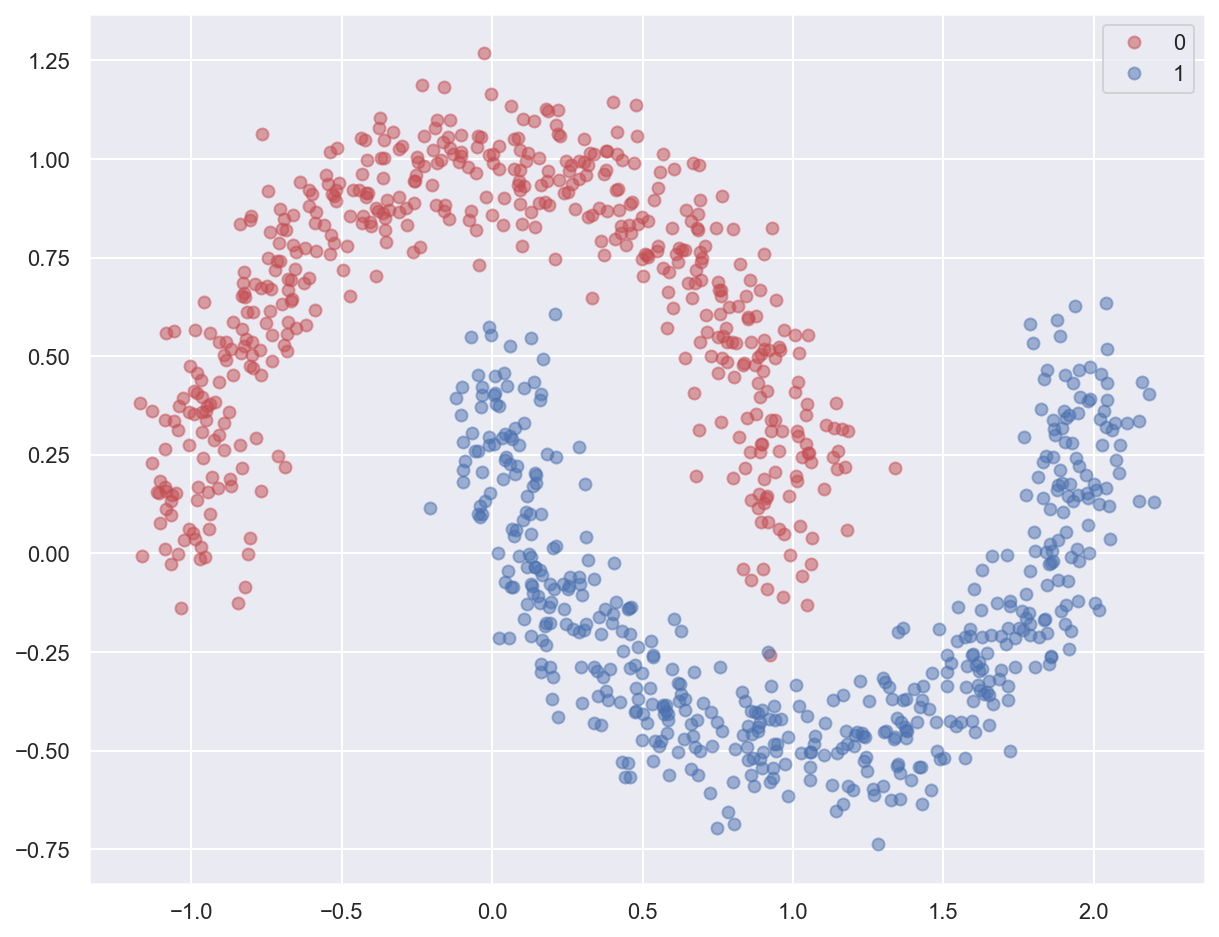

In [21]:
# Generate moon-shaped, non-linearly separable data
x, y = make_moons(n_samples=1000, noise=0.10, random_state=0)

print(f'x: {x.shape}. y: {y.shape}')
plot_planar_data(x, y)

In [22]:
# Create PyTorch tensors from Numpy data, with appropriate types
x_train = torch.from_numpy(x).float()
y_train = torch.from_numpy(y).long()

#### Model definition

In [23]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
dense_model = nn.Sequential(
    nn.Linear(in_features=2, out_features=3),
    nn.Tanh(),
    nn.Linear(in_features=3, out_features=2)
)

print(dense_model)

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): Tanh()
  (2): Linear(in_features=3, out_features=2, bias=True)
)


In [24]:
# The nn package also contains definitions of popular loss functions; in this
# case we will use Cross Entropy as our loss function.
loss_fn = nn.CrossEntropyLoss()

# Used to enable training analysis through TensorBoard
# Writer will output to ./runs/ directory by default
writer = SummaryWriter()

#### Model training

In [25]:
learning_rate = 1.0
num_epochs = 2000

for epoch in range(num_epochs):
    # Forward pass: compute model prediction
    y_pred = dense_model(x_train)

    # Compute and print loss
    loss = loss_fn(y_pred, y_train)
    
    # Optionnal display section
    if epoch % 100 == 0:
        print(f"Epoch [{epoch+1:4}/{num_epochs}], loss: {loss:.6f}")
        # Write epoch loss for TensorBoard
        writer.add_scalar("Loss/train", loss.item(), epoch)

    # Zero the gradients before running the backward pass
    # Avoids accumulating gradients erroneously
    dense_model.zero_grad()

    # Backward pass: compute gradient of the loss w.r.t all the learnable parameters of the model
    loss.backward()

    # Update the weights using gradient descent
    # no_grad() avoids tracking operations history here
    with torch.no_grad():
        for param in dense_model.parameters():
            param -= learning_rate * param.grad


print(f"Training finished. Final loss: {loss:.6f}")

Epoch [   1/2000], loss: 0.657267
Epoch [ 101/2000], loss: 0.255628
Epoch [ 201/2000], loss: 0.254040
Epoch [ 301/2000], loss: 0.252782
Epoch [ 401/2000], loss: 0.251454
Epoch [ 501/2000], loss: 0.249780
Epoch [ 601/2000], loss: 0.241196
Epoch [ 701/2000], loss: 0.051900
Epoch [ 801/2000], loss: 0.022750
Epoch [ 901/2000], loss: 0.014795
Epoch [1001/2000], loss: 0.011221
Epoch [1101/2000], loss: 0.009204
Epoch [1201/2000], loss: 0.007908
Epoch [1301/2000], loss: 0.007002
Epoch [1401/2000], loss: 0.006333
Epoch [1501/2000], loss: 0.005816
Epoch [1601/2000], loss: 0.005404
Epoch [1701/2000], loss: 0.005068
Epoch [1801/2000], loss: 0.004789
Epoch [1901/2000], loss: 0.004552
Training finished. Final loss: 0.004350


#### Training analysis with TensorBoard

More info on PyTorch/TensorBoard integration [here](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html).

In [26]:
%tensorboard --logdir=runs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "C:\Users\Lenovo\Anaconda3\envs\apprentissages_auto_profond\Scripts\tensorboard-script.py", line 9, in <module>
    sys.exit(run_main())
  File "C:\Users\Lenovo\Anaconda3\envs\apprentissages_auto_profond\lib\site-packages\tensorboard\main.py", line 65, in run_main
    default.get_plugins() + default.get_dynamic_plugins(),
  File "C:\Users\Lenovo\Anaconda3\envs\apprentissages_auto_profond\lib\site-packages\tensorboard\default.py", line 125, in get_dynamic_plugins
    "tensorboard_plugins"
  File "C:\Users\Lenovo\Anaconda3\envs\apprentissages_auto_profond\lib\site-packages\tensorboard\default.py", line 124, in <listcomp>
    for entry_point in pkg_resources.iter_entry_points(
  File "C:\Users\Lenovo\Anaconda3\envs\apprentissages_auto_profond\lib\site-packages\pkg_resources\__init__.py", line 2446, in load
    self.require(*args, **kwargs)
  File "C:\Users\Lenovo\Anaconda3\en

### Example 2: training a convnet on CIFAR10

#### Data loading and preparation

In [27]:
# Transform images of range [0, 1] into tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load training set
trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
# Get an iterable from training set
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False, num_workers=2
)

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data\cifar-10-python.tar.gz


100.0%

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#### Expected network architecture

[![Example CNN architecture](images/cnn_example.png)](https://github.com/gwding/draw_convnet)

In [34]:
# Define a CNN that takes (3, 32, 32) tensors as input (channel-first)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # Convolution output is 16 5x5 feature maps, flattened as a 400 elements vectors
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [35]:
cnn_model = Net()
print(cnn_model)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


#### Model training

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 2

# Loop over the dataset multiple times
for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        # inputs is a 4D tensor of shape (batch size, channels, rows, cols)
        # labels is a 1D tensor of shape (batch size,)
        inputs, labels = data

        # Reset the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = cnn_model(inputs)

        # Loos computation
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # GD step
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(
                f"Epoch [{epoch+1}/{num_epochs}], batch {i+1:5}, loss: {running_loss / 2000:.6f}"
            )
            running_loss = 0.0


print(f"Training finished")

Epoch [1/2], batch  2000, loss: 2.079842
Epoch [1/2], batch  4000, loss: 1.714919
Epoch [1/2], batch  6000, loss: 1.588226
Epoch [1/2], batch  8000, loss: 1.485849
Epoch [1/2], batch 10000, loss: 1.426849
Epoch [1/2], batch 12000, loss: 1.392476
Epoch [2/2], batch  2000, loss: 1.314602
Epoch [2/2], batch  4000, loss: 1.320099
Epoch [2/2], batch  6000, loss: 1.288645
Epoch [2/2], batch  8000, loss: 1.265038
Epoch [2/2], batch 10000, loss: 1.254979
Epoch [2/2], batch 12000, loss: 1.226974
Training finished


#### Model evaluation

In [31]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        # Load inputs and labels
        images, labels = data
        # Compute model predictions for batch. Shape is (batch size, number of classes) so(4, 10) here
        outputs = cnn_model(images)
        # Get the indexes of maximum values along the second axis
        # This gives us the predicted classes (those with the highest prediction value)
        _, predicted = torch.max(outputs.data, dim=1)
        total += labels.size(0)
        # Add the number of correct predictions for the batch to the total count
        correct += (predicted == labels).sum().item()

print(f"Test acccuracy: {(100 * correct / total)}%")

Test acccuracy: 57.54%
